# <center>Enron Scandal Analysis</center>

Background Description: 
Enron Corporation, an American energy, commodities and services company, was founded in 1985 and used to be one of the world's major electricity and natural gas companies with claimed revenues of nearly $101 billion during 2000. Fortune nominated Enron as "American Most Innovative Company" for six consecutive years.("Enron", 2017) There is no denying that Enron Corp. reached dramatics height and with its roots in the universal utility services, the company built a solid reputation for old-economy stability. Lead by one of the smartest business man, Jeffery Skilling(CEO), Enron finally became the largest dominant force in the energy and natural gas sectors with an extensive pipline network in North America. Undoubtedly, by far, Enron's story was perfect and splendid. However, not all great stories come with happy endings. Enron eventually faced a dizzying collapse and by the fall of 2000, the company was starting to crumble under its own weight. Actually Enron collapsed so fast that it only took several weeks for this seventh largest company in America to claim a bankruptcy at the end of 2001.

Enron was revealed that its published financial condition was inflated by institutionalized accounting fraud and its income as well as equity value were both overstated by a couple of billion dollars. As revealed by the investigator, the company had made a dozen partner companies and used those companies to hide its financial losses and debts on its trading business.("The fall of eron", 2017) The impact of this company bankruptcy was extensive and unprecedented. It wiped out the remaining holdings of thousands of investors and throwed 21,000 people out of work. At the same time, Arthur Andersen, one of the "Big Five" accounting firms in the world, was convicted of complicating in perpetrating one of the biggest frauds in corporate history and later surrendered its CPA licenses on 2002. Not only does this swift collapse have a huge impact on bunsiness, but it also had implications for politics. Two federal agencies and more than ten congressional committees were investigated and found guilty of criminal charges. What was going wrong on Enron's business and how could we prevent it in the future? These two major questions soon became increasingly importatnt to the public.

<b> In this project, I will build a Person of Interest identifier/Label and try to build a Machine Learning Algorithm to predict the possible Persons of Interest based on various features.</b>

## 1. Data Initial Exploration

In [1]:
# Initial imports
import sys
import os
import pickle
import re
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import warnings
warnings.filterwarnings('ignore')

# To show visualizations in iPython
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as f:
    enron_data = pickle.load(f)

The dataset contains 146 entries as indexes, and 21 features as columns. Each entry, is an observation for a specific person/employee in the company. The features contain financial information for each observation, as well as, their emails addresses.

All observations have 1 more feature called POI. POI is the abbreviated version of Person of Interest. This feature is used to mark whether a specific person in the dataset has been part of the Enron Scandal or not.

In [3]:
# Unsorted data

#print(enron_data)

In [4]:
# Print the data associated with one of the Top execitives -Jeffrey Skilling
pprint.pprint(enron_data)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

                      'restricted_stock': 956775,
                      'restricted_stock_deferred': 'NaN',
                      'salary': 199157,
                      'shared_receipt_with_poi': 723,
                      'to_messages': 936,
                      'total_payments': 1414857,
                      'total_stock_value': 1621236},
 'FOWLER PEGGY': {'bonus': 'NaN',
                  'deferral_payments': 'NaN',
                  'deferred_income': 'NaN',
                  'director_fees': 'NaN',
                  'email_address': 'kulvinder.fowler@enron.com',
                  'exercised_stock_options': 1324578,
                  'expenses': 'NaN',
                  'from_messages': 36,
                  'from_poi_to_this_person': 0,
                  'from_this_person_to_poi': 0,
                  'loan_advances': 'NaN',
                  'long_term_incentive': 'NaN',
                  'other': 'NaN',
                  'poi': False,
                  'restricted_stock': 560

                     'salary': 339288,
                     'shared_receipt_with_poi': 3962,
                     'to_messages': 7259,
                     'total_payments': 10425757,
                     'total_stock_value': 5167144},
 'LAY KENNETH L': {'bonus': 7000000,
                   'deferral_payments': 202911,
                   'deferred_income': -300000,
                   'director_fees': 'NaN',
                   'email_address': 'kenneth.lay@enron.com',
                   'exercised_stock_options': 34348384,
                   'expenses': 99832,
                   'from_messages': 36,
                   'from_poi_to_this_person': 123,
                   'from_this_person_to_poi': 16,
                   'loan_advances': 81525000,
                   'long_term_incentive': 3600000,
                   'other': 10359729,
                   'poi': True,
                   'restricted_stock': 14761694,
                   'restricted_stock_deferred': 'NaN',
                   'sa

                        'director_fees': 'NaN',
                        'email_address': 'jeff.skilling@enron.com',
                        'exercised_stock_options': 19250000,
                        'expenses': 29336,
                        'from_messages': 108,
                        'from_poi_to_this_person': 88,
                        'from_this_person_to_poi': 30,
                        'loan_advances': 'NaN',
                        'long_term_incentive': 1920000,
                        'other': 22122,
                        'poi': True,
                        'restricted_stock': 6843672,
                        'restricted_stock_deferred': 'NaN',
                        'salary': 1111258,
                        'shared_receipt_with_poi': 2042,
                        'to_messages': 3627,
                        'total_payments': 8682716,
                        'total_stock_value': 26093672},
 'STABLER FRANK': {'bonus': 500000,
                   'deferral_payments': 'N

In [5]:
# Number of total people in the dataset

names = enron_data.keys()
print("Total number of people in the data: " + str(len(names)))

# Number of features available in the dataset

random_val = enron_data['BOWEN JR RAYMOND M']
print("Total number of features: " + str(len((random_val).keys())))

# List all features

print(random_val.keys())

# Number of POIs in the dataset

def count_poi(data):
    count = 0
    data_keys = data.keys()
    for person in data_keys:
        if data[person]['poi'] == True:
            count += 1
    return count

total_poi_true = count_poi(enron_data)
print("number of poi: " + str(total_poi_true))

Total number of people in the data: 146
Total number of features: 21
dict_keys(['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'])
number of poi: 18


## 2. Use Pandas Dataframe to load the dataset one more time

In [6]:
enron_df = pd.DataFrame.from_dict(enron_data, orient = 'index')

enron_df.head(10)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
MORDAUNT KRISTINA M,267093,NaN,NaN,628522,NaN,325000,kristina.mordaunt@enron.com,NaN,NaN,208510,...,NaN,NaN,NaN,1411,NaN,False,NaN,NaN,208510,NaN
MEYER ROCKFORD G,NaN,232,1848227,1848227,NaN,NaN,rockford.meyer@enron.com,NaN,NaN,955873,...,0,493489,28,NaN,0,False,NaN,22,462384,NaN
MCMAHON JEFFREY,370448,2355,NaN,4099771,NaN,2600000,jeffrey.mcmahon@enron.com,NaN,NaN,1662855,...,58,1104054,48,297353,26,False,694862,2228,558801,NaN
HAEDICKE MARK E,374125,4009,2157527,3859065,NaN,1150000,mark.haedicke@enron.com,-329825,-934484,803094,...,180,608750,1941,52382,61,False,983346,1847,524169,NaN
PIPER GREGORY F,197091,1238,1130036,1737629,NaN,400000,greg.piper@enron.com,-409554,-33333,880290,...,61,880290,222,778,48,False,NaN,742,409554,NaN


In [7]:
# Describe Statistics
enron_df.describe().transpose()


,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
loan_advances,146,5,NaN,142
bonus,146,42,NaN,64
email_address,146,112,NaN,35
restricted_stock_deferred,146,19,NaN,128
deferred_income,146,45,NaN,97
total_stock_value,146,125,NaN,20


## 3. Clean `NaN` Values

Data Cleaning: Convert `NaN` to `""` or `0` according to the column type.

In [8]:
# Clean NaN
enron_df.fillna(0, inplace = True)
enron_df.replace(to_replace = 'NaN', value = 0.0, inplace = True)

In [9]:
# Check if NaN is all gone
enron_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,146.0,3.658114e+05,2.203575e+06,0.0,0.00,210596.0,270850.50,26704229.0
to_messages,146.0,1.221589e+03,2.226771e+03,0.0,0.00,289.0,1585.75,15149.0
deferral_payments,146.0,4.387965e+05,2.741325e+06,-102500.0,0.00,0.0,9684.50,32083396.0
total_payments,146.0,4.350622e+06,2.693448e+07,0.0,93944.75,941359.5,1968286.75,309886585.0
loan_advances,146.0,1.149658e+06,9.649342e+06,0.0,0.00,0.0,0.00,83925000.0
bonus,146.0,1.333474e+06,8.094029e+06,0.0,0.00,300000.0,800000.00,97343619.0
restricted_stock_deferred,146.0,2.051637e+04,1.439661e+06,-7576788.0,0.00,0.0,0.00,15456290.0
deferred_income,146.0,-3.827622e+05,2.378250e+06,-27992891.0,-37926.00,0.0,0.00,0.0
total_stock_value,146.0,5.846018e+06,3.624681e+07,-44093.0,228869.50,965955.0,2319991.25,434509511.0
expenses,146.0,7.074827e+04,4.327163e+05,0.0,0.00,20182.0,53740.75,5235198.0


## 4. More Cleaning - duplicates

In [10]:
# Drop the duplicates in rows
enron_df.drop_duplicates(inplace = True)

## 5. Outlier Removal

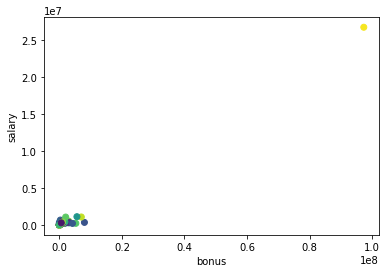

In [11]:
# Seperate bonus and salary from data variable

bonus = enron_df['bonus']
salary = enron_df['salary']

# Draw scatter plot
colors = np.random.rand(len(bonus))
plt.scatter(bonus, salary, c = colors)
plt.xlabel('bonus')
plt.ylabel('salary')
plt.show()

There is a key "Total" that represents the total value added for each column. That's the reason why we have this outlier

In [12]:
enron_df.loc["TOTAL"]

salary                        26704229.0
to_messages                          0.0
deferral_payments             32083396.0
total_payments               309886585.0
loan_advances                 83925000.0
bonus                         97343619.0
email_address                        0.0
restricted_stock_deferred     -7576788.0
deferred_income              -27992891.0
total_stock_value            434509511.0
expenses                       5235198.0
from_poi_to_this_person              0.0
exercised_stock_options      311764000.0
from_messages                        0.0
other                         42667589.0
from_this_person_to_poi              0.0
poi                                False
long_term_incentive           48521928.0
shared_receipt_with_poi              0.0
restricted_stock             130322299.0
director_fees                  1398517.0
Name: TOTAL, dtype: object

In [13]:
# verify by getting the total and max value of bonus
def get_total_and_max(data):
    max_v = data[0]
    second_max_v = data[0]
    if len(data) == 0:
        return 0
    for item in data:
        """
        if item > both max_v and second_max_v:
            max_v = item
            second_max_v = max_v
        elif item only > second_max_v:
            second_max_v = item
        else:
            nothing, continue loop
        """
        if item > max_v and item > second_max_v:
            second_max_v = max_v
            max_v = item
        elif item > second_max_v:
            second_max_v = item
        else:
            continue
    return second_max_v

second_largest_bonus = get_total_and_max(bonus)
second_largest_salary = get_total_and_max(salary)
tot_sal = salary.max()
tot_bonus = bonus.max()

print("total salary: " + str(tot_sal) + ", max salary: " + str(second_largest_salary))
print("total bonus: " + str(tot_bonus) + ", max bonus: " + str(second_largest_bonus))

total salary: 26704229.0, max salary: 1111258.0
total bonus: 97343619.0, max bonus: 8000000.0


We will redraw the scatter plot by removing the outlier "TOTAL". During the removal, we should also not include the data that is meaningless to our anlysis.

In [14]:
# Remove outliers in eron_data
enron_data.pop('TOTAL', 0)
enron_data.pop('THE TRAVEL AGENCY IN THE PARK', 0)


{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 362096,
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 362096,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [15]:
# Remove two rows from dataframe
enron_df.drop(['TOTAL'], axis = 0, inplace = True)
enron_df.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0, inplace = True)

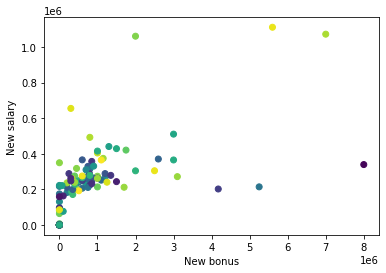

In [16]:
# Remove outliers in array bonus and salary in order to draw the scatter plot
bonus = enron_df['bonus']
salary = enron_df['salary']

# Draw scatter plot
colors = np.random.rand(len(bonus))
plt.scatter(bonus, salary, c = colors)
plt.xlabel('New bonus')
plt.ylabel('New salary')
plt.show()

## 6. Decision Tree Classifier

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [18]:
# Selecting all the features

features_list = ['to_messages', 'deferral_payments', 'loan_advances', 'restricted_stock_deferred','deferred_income',
                'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 
                'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'restricted_stock',
               'director_fees']

# Generate labels and features
labels = enron_df['poi'].tolist()
features = enron_df[features_list].values.tolist()

In [19]:
# Split data into trainings and testings
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2)

In [20]:
# Train the decision tree model

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)

In [21]:
# Check the accuracy scores
predictions = clf.predict(features_test)
accuracy_score(labels_test, predictions)

0.8620689655172413

## 7. Model Evaluation

Validation is the strategy to evaluate the performance of the model on unseen data. A classic mistake is to evaluate the performance of an algorithm on the same dataset it was trained on. It will make our algorithm perform better than it actually does. However, we will have no idea how our algorithm performs on unseen data.

It is essential practice in data mining procedures to keep a subset of data as holdout data- test data. We train our model on training data and examine the generalization performance of the model on the test data. We hide the label for target variable of the test data from the model and let the model predict the values for target variable. Then we compare the values predicted by the model with the hidden true values. We can also use a more sophisticated holdout training and testing procedure called cross-validation.

There are a number of evaluation metrics for classification challenges. In balanced classes, where all the labels are equally represented, we look at classification accuracy of the model.

$$ Accuracy = \frac{Number\:of\:labels\:predicted\:correctly}{Total\:number\:of\:predictions} = \frac{TruePositive}{FalsePositive} $$

However, accuracy is not ideal for skewed classes. In our case, number of POI are small compared to non-POI (18 vs 128). We can have high accuracy by classifying many non-POI correctly and still not have a POI classified correctly. For imbalanced classes like we have, Precision and Recall are common measures of model performance

$$ Recall = \frac{TruePositive}{TruePositive + FalseNegative} $$

A good precision means that whenever a POI gets flagged in my test set, I know with a lot of confidence that it's very likely to be a real POI and not a flase alarm. A low precision indicates a large number of False Positives, where non-POI gets flagged as POI.

A good recall means nearly I am able to identify a POI everytime it shows up in the test cases. A lov recall indicates many False Negatives, where POIs don't get flagged correctly

F1 score conveys a balance between precision and recall. It is the harmonic mean of precision and recall.

$$ F_1 = \frac{2*precision*recall}{precision+recall} $$

A good F1-score means both my false positives and false negatives are low, I can identify my POI's reliably and accurately. If my classifier flags a POI then the person is almost certainly a POI, and if the classifier does not flag someone, then they are almost certainly not a POI.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
clf = tree.DecisionTreeClassifier(class_weight = None, criterion = 'entropy', max_depth = None,
                            max_features = None, max_leaf_nodes = None, min_impurity_decrease = 0.0,
                            min_impurity_split = None, min_samples_leaf = 6, min_samples_split = 2,
                            min_weight_fraction_leaf = 0.0, presort = False, random_state = 1, splitter = 'best')

clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)


In [24]:
print("Accuracy:", round(accuracy_score(labels_test, predictions), 10))
print("Precision:", round(precision_score(labels_test, predictions), 10))
print("Recall:", round(recall_score(labels_test, predictions), 10))
print("F1-Score:", round(f1_score(labels_test, predictions), 10))

Accuracy: 0.8965517241
Precision: 0.3333333333
Recall: 0.5
F1-Score: 0.4


## 8. Conclusion

The precision can be interpreted as the likelihood that a person who is identified as a POI is actually a true POI; the fact that this is 0.67 means that using this identifier to flag POI's would result in 33% of the positive flags being false alarms. Recall measures how likely it is that identifier will flag a POI in the test set. 50% of the time it would catch that person, and 50% of the time it wouldn't. These numbers are quite good but we still can improve the strategy. One of the possible paths to improvement is digging in to the emails data more. The email features in the starter dataset were aggregated over all the messages for a given person. By digging into the text of each individual's messages, it's possible that more detailed patterns (say, messages to/from a specific address, rather than just messages to/from any POI address, or the usage of specific vocabulary terms) might emerge. Since we live in a world in which more POI finance data might not be easy to find, the next realistic thing to try might be to extract more data from the emails.